In [102]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
import pprint
import numpy as np
warnings.filterwarnings('ignore')
%matplotlib inline

# Question 1
#### 1.1)

In [103]:
import pandas as pd
df = pd.read_csv('prices.csv')
df.head(5)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


The second row reads the CSV file called "prices.csv" and build a pandas.Dataframe object from it. <br>
The third row prints the first 5 rows of the Dataframe

#### 1.2)

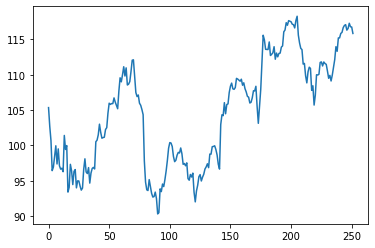

In [104]:
mask = df['date'].apply(lambda x: x[:4] == '2016')
df = df[mask]
df = df[df['symbol'] == 'AAPL'].reset_index()
apple_close_prices = df.close
apple_close_prices.plot()
plt.show()

The first row returns a Series object indicatine which rows have the value '2016' as the year value in the 'date' column.<br>
The second row filters the original Dataframe according to the indecies previously found.<br>
The third row filters the Dataframe to only have rows which have the symbol 'AAPL' and resets the indecies to the new Dataframe.<br>
The fourth row is assigning the 'close' column to a new variable called 'apple close prices'.<br>
The fifth and sixth line are plotting commands.


#### 1.3)

In [105]:
def load_shares():
    import numpy as np
    prices = pd.read_csv('prices.csv')
    shares = pd.read_csv('securities.csv')
    symbols = shares['Ticker symbol']
    sectors = shares['GICS Sector']
    prices_to_rtn = np.array([[0]*252])
    for i,symbol in tqdm(enumerate(symbols)):
        mask = prices['date'].apply(lambda x: x[:4] == '2016')
        prices_temp = prices[mask]
        prices_temp = prices_temp[prices_temp['symbol'] == symbol].reset_index()
        comp_close_prices = prices_temp.close
        try:
            prices_to_rtn = np.vstack((prices_to_rtn,comp_close_prices.to_numpy()))
        except:
            symbols = symbols.drop(i)
            sectors = sectors.drop(i)
    symbols = symbols.reset_index(drop = True).to_numpy()
    sectors = sectors.reset_index(drop = True).to_numpy()
    prices_to_rtn = prices_to_rtn[1:]
    return symbols, prices_to_rtn, sectors 

In [106]:
symbols, prices, sectors = load_shares()

505it [03:05,  2.72it/s]


#### 1.4)

In [107]:
def pca_project(X,k):
    x_hat = X.mean(axis = 0)
    temp = np.zeros(X.shape)
    for i,x in enumerate(X):
        temp[i] = x-x_hat
    XXT = temp.T @ temp
    vs = np.linalg.eigh(XXT)[1].T[::-1]
    vs = vs[:k]
    proj_X = np.array([[0]*k])
    for xj in X:
        proj_X = np.vstack((proj_X,np.array([np.dot(xj,v) for v in vs])))
    proj_X = proj_X[1:]
    return proj_X

#### 1.5)

In [108]:
def plot_sectors(proj, sectors, sectors_to_plot):
    plt.figure(figsize=(9, 9))
    for sector in sectors_to_plot:
        proj_to_plot = proj[np.where(sectors == sector),:].T
        x,y = proj_to_plot
        plt.scatter(x,y, label = sector)
    plt.legend()
    plt.show()
    

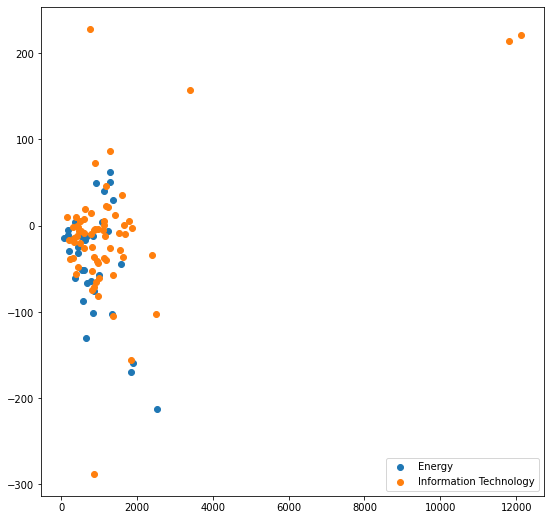

In [109]:
proj = pca_project(prices,2)
plot_sectors(proj,sectors, ['Energy','Information Technology'])

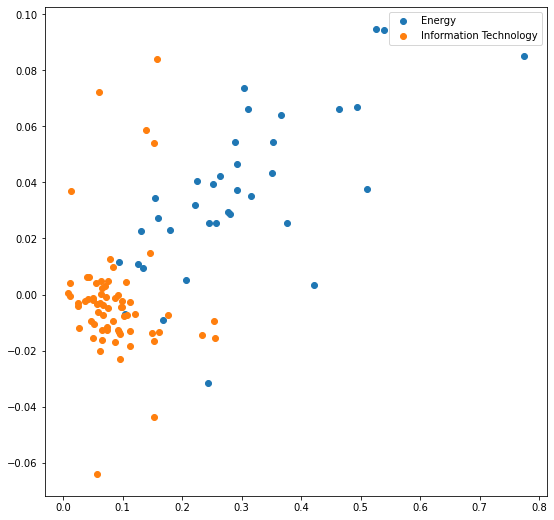

In [110]:
n, m = prices.shape
new_X = np.array([[np.log(price[i+1])-np.log(price[i]) for i in range(m-1)] for price in prices])
proj = pca_project(new_X,2)
plot_sectors(proj,sectors, ['Energy','Information Technology'])

#### 1.6)

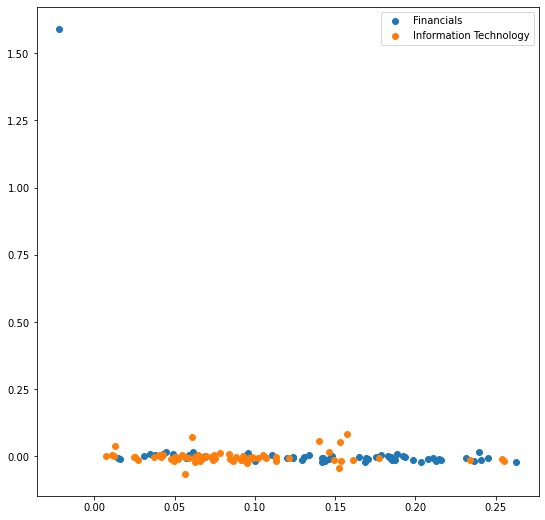

In [111]:
n, m = prices.shape
new_X = np.array([[np.log(price[i+1])-np.log(price[i]) for i in range(m-1)] for price in prices])

proj = pca_project(new_X,2)
# import numpy as np
# print(prices[np.where(symbols == 'ICE')])
plot_sectors(proj,sectors, ['Financials','Information Technology'])

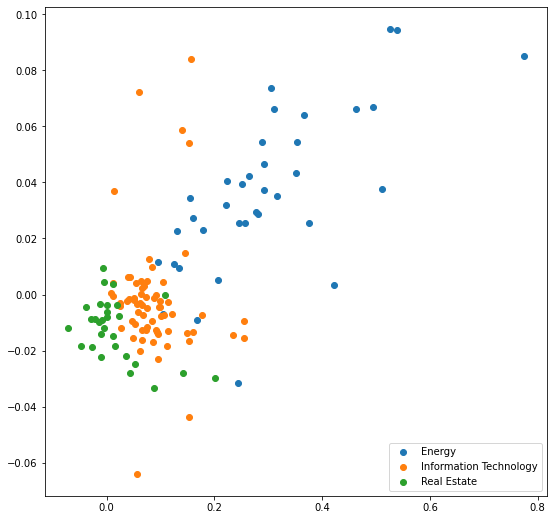

In [112]:
n, m = prices.shape
new_X = np.array([[np.log(price[i+1]) - np.log(price[i]) for i in range(m - 1)] for price in prices])
proj = pca_project(new_X,2)
plot_sectors(proj,sectors, ['Energy','Information Technology','Real Estate'])

If one would like to diversify their invesment protfolio we would recommand against investing solely in the Information Technology and the Real Estate sectors, as their preformance seems to be very similar and therefore similar - risk-wise.<br>
However, from this graph we can deduce that the Energy Sector behaves differently than the other two sectors so if one would want to diversify risks, they should invest in the Energy sector and one other sector from the two sectors mentioned above.

#### 1.7)


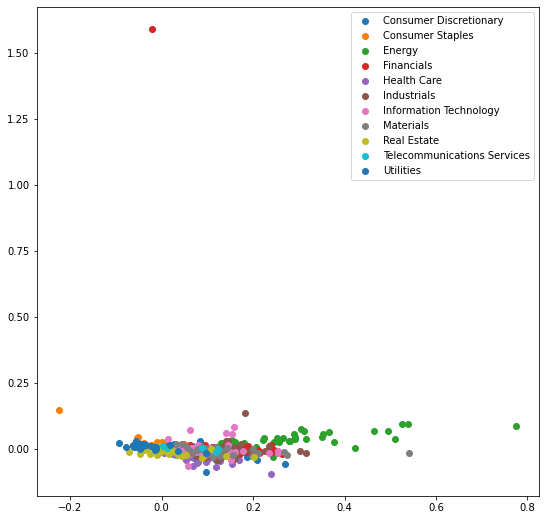

In [113]:
n, m = prices.shape
new_X = np.array([[np.log(price[i+1])-np.log(price[i]) for i in range(m-1)] for price in prices])
proj = pca_project(new_X,2)
plot_sectors(proj,sectors, np.unique(sectors))

In [114]:
def find_best(prices,sector):
    proj_to_plot = proj[np.where(sectors == sector),:].T
    sym_to_ann = symbols[np.where(sectors == sector)].T
    x,y = proj_to_plot
    plt.figure(figsize=(9,9))    
    for i,text in enumerate(sym_to_ann):
        plt.scatter(x[i],y[i])
        plt.annotate(text, (x[i],y[i]))
    plt.show()

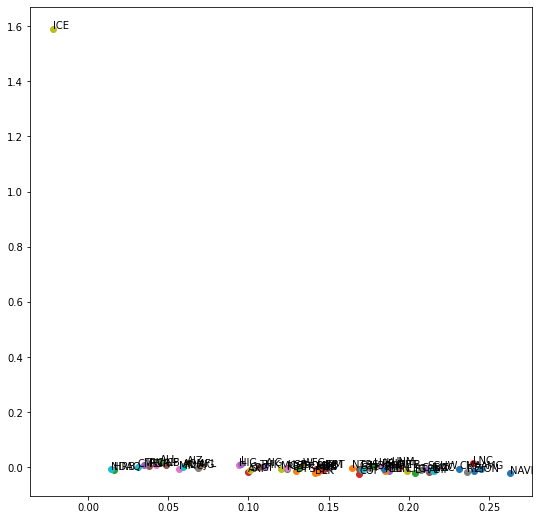

In [117]:
n, m = prices.shape
new_X = np.array([[np.log(price[i+1])-np.log(price[i]) for i in range(m-1)] for price in prices])
proj = pca_project(new_X,2)
find_best(proj,'Financials')

From this graph we can deduce that the stock that stands out is the ICE stock.<br>
We will check it's preformance in comparison to the NAVI stock which is closer to the rest of the stocks.

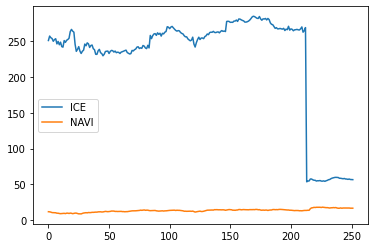

In [119]:
import pandas as pd
df = pd.read_csv('prices.csv')
mask = df['date'].apply(lambda x: x[:4] == '2016')
df1 = df[mask]
df1 = df1[df1['symbol'] == 'ICE'].reset_index()
ICE_close_prices = df1.close
df2 = df[mask]
df2 = df2[df2['symbol'] == 'NAVI'].reset_index()
NAVI_close_prices = df2.close
plt.plot(ICE_close_prices, label = 'ICE')
plt.plot(NAVI_close_prices, label = 'NAVI')
plt.legend()
plt.show()

From this graph we can see the a 'typical' stock like NAVI remains fairly stable throughout the year as opposed to the ICE stock which had it's ups and downs throughout the year but towards the end of the year suddenly dropped dramatically.<br>
From this we can understand that stocks who behave in a stable manner will have values close to around zero and stocks who change rapidly will appear as an outlier.